# Project Newton Fractals: NUMA01
### Luca Bertolani

In [1]:
from numpy import *
import sympy as sp
import matplotlib.pyplot as plt
%matplotlib

Using matplotlib backend: Qt5Agg


In [2]:
class Fractal2D:
    def __init__(self, f, numera=0, h=0.01, error=1.e-3):
        """
        numera = 0
        function is made into a sympy object to compute jacobian
        and multiple (J^-1*F) is made into a numpy function for faster numeric
        computation, 
        
        numera = 1 
        Same as 0 but uses simplified newton method instead
        
        numera = 2
        Uses numeric approximation using derivative definition and given h
        
        """
        
        functions = ['newton_sympy', 'newton_simple', 'newton_numeric']
        self.functioner = functions[numera]
        
        if numera is 0:
            self.f = sp.Matrix(f)
            jc = self.f.jacobian([x, y])
            self.j_f = sp.lambdify((x, y), jc**-1 * self.f, 'numpy')
        elif numera is 1:
            f1 = sp.Matrix(f)
            jc = f1.jacobian([x, y])
            self.j_f = sp.lambdify((x, y), jc**-1, 'numpy')
            self.f = sp.lambdify((x, y), f)
        elif numera is 2:
            self.f = sp.lambdify((x, y), f)
            f1 = sp.lambdify((x, y), f[0])
            f2 = sp.lambdify((x, y), f[1])
            
            self.j_f = lambda x, y: linalg.inv(array([
                    [(f1(x + h, y) - f1(x, y))/h, (f1(x, y + h) - f1(x, y))/h],
                    [(f2(x + h, y) - f2(x, y))/h, (f2(x, y + h) - f2(x, y))/h]]))
            
        
        self.zeroes = []
        self.error = error
        
    def newton_sympy(self, x0):
        """Applies Newton's method --> Xn+1 = Xn - (J^-1*F)(Xn).

        Uses lambdified (J^-1*F)(Xn) and array of x0 for fast numpy calculations,
        returns None if divergent

        Iterates upto |dx| < error, or until 600 iterations 
        """
        x0 = array(x0)

        for i in range(400):
            current_mul = self.j_f(*x0)[:,0]
            x0 = x0 - current_mul
            if linalg.norm(current_mul) < self.error:
                x0 = x0, i
                break
        else:
            x0 = None, None
        return x0
    
    def newton_numeric(self, x0):
        """Applies Newton's method using numeric approximation given by h"""
        x0 = array(x0)

        for i in range(400):
            current_mul = matmul(self.j_f(*x0), array(self.f(*x0)))
            
            x0 = x0 - current_mul
            if linalg.norm(current_mul) < self.error:
                x0 = x0, i
                break
        else:
            x0 = None, None
        return x0

    def newton_simple(self, x0):
        """Applies Newton's method but computes Jacobian only once"""
        x0 = array(x0)
        muler = self.j_f(*x0)

        for i in range(400):
            current_mul = matmul(muler, array(self.f(*x0)))
            
            x0 = x0 - current_mul
            if linalg.norm(current_mul) < self.error:
                x0 = x0, i
                break
        else:
            x0 = None, None
        return x0
    
    
    def add_zeroes(self, x0, functer):
        """Applies specified newton function on intial point and add zeros to list,
        returns index of zero or None if divergent + number of iterations."""
        
        zero, ier = functer(x0)
        
        if zero is None:
            return None

        for i in range(len(self.zeroes)):
            if linalg.norm(zero - self.zeroes[i]) < self.error:
                return i + ier
        else:
            self.zeroes.append(zero)
            return len(self.zeroes) + ier


    def plot(self, N, a, b):
        """Plots fractal by forming meshgrid, computing zeroes and plotting
        based on converging zeroes and number of iterations"""
        
        vals = linspace(a, b, N)
        xx, yy = meshgrid(vals, vals)
        A = zeros(shape=(N, N))
        
        functer = eval('self.' + self.functioner)
        
        for i in range(N):
            for j in range(N):
                A[i, j] = self.add_zeroes((xx[i, j], yy[i, j]), functer)

        plt.pcolormesh(xx, yy, A, cmap='inferno', shading='gouraud')
        plt.show()

In [3]:
x, y = sp.symbols('x, y')

f1 = [x**3 - 3*x*(y**3) - 1, 3*(x**2)*y - y**3]

f2 = [x**3 - 3*x*(y**3) - 2*x - 2, 3*(x**2)*y - y**3 - 2*y]

f3 = [x**8 - 28*(x**6)*(y**2) + 70*(x*y)**4 + 15*x**4 - 28*(x**2)*(y**6)
      - 90*(x*y)**2 + y**8 + 15*y**4 - 16,
      8*(x**7)*y - 56*(x**5)*(y**3) + 56*(x**3)*(y**5) + 60*(x**3)*y
      - 60*x*(y**3) - 8*x*(y**7)]

In [4]:
mainFractal1 = Fractal2D(f1, numera=0); mainFractal2 = Fractal2D(f2, numera=0); mainFractal3 = Fractal2D(f3, numera=2)
mainFractal4 = Fractal2D(f3, numera=1)

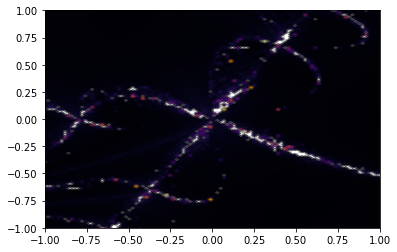

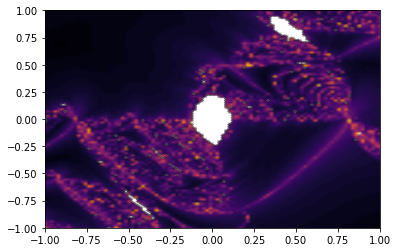

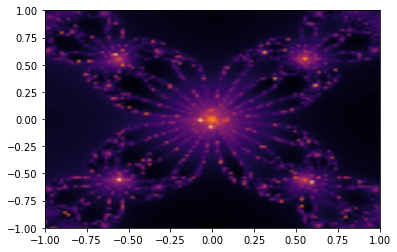

<string>:2: RuntimeWarning: overflow encountered in double_scalars
<string>:2: RuntimeWarning: invalid value encountered in double_scalars


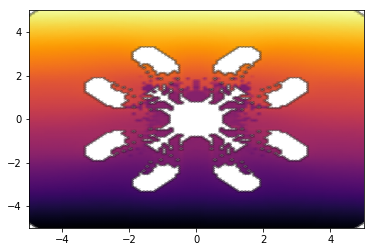

In [5]:
mainFractal1.plot(100, -1, 1)
mainFractal2.plot(100, -1, 1)
mainFractal3.plot(100, -1, 1)
mainFractal4.plot(100, -5, 5)

The following are fractals of all functions at high resolutions. f1 at N = 500, and N = 400 for f2, f3.

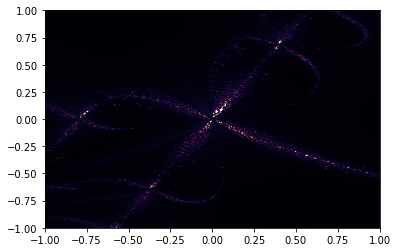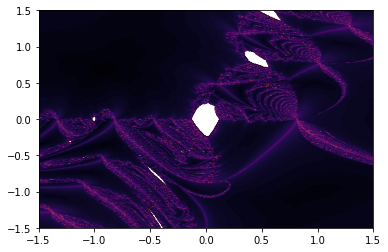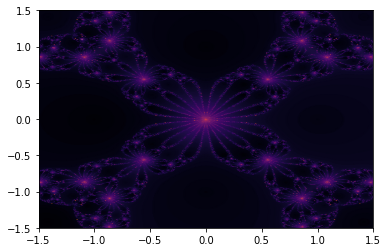